# 계층 ( Layer )
* 국소적 계산
  * 내가 관심있는 연산만 신경 쓰는 것
  * **계층**별로 국소적 계산이 일어난다!
  * 하나의 계층은 하나의 일만( 국소적 ) 전문적으로 할 수 있어야 한다.
* 예를 들어 ReLU 계층을 만들었으면, ReLU에 대한 순전파(forward), 역전파(backward)만 신경 쓰자...

## 레이어 구현의 주안점
* 순전파와, 역전파를 어떻게 구현해야 할지에 대한 계획을 세워야 한다.
  1. 논문을 보고 하는 경우
    * 논문에 나와있는 순전파, 역전파 수식을 연구
    * 수식을 효율적, 간편하게 짤 수 있는지에 대한 연구 ( 웬만하면 코드 한줄로 마무리 )
    * 조건문, 반복문을 최대한 배제 (단, 레이어 구축에 대한 논문은 제외...)
  2. 스스로 비즈니스를 만들어서 하는 경우
    * 수식을 세우고 컴퓨터로 테스트를 해 봐야 한다.(수식이 컴퓨터에 효율적인지...)
    * Overflow, Underflow 등 컴퓨터에 맞는 수식을 세웠는지 컴퓨터로 검증이 필요하다.

# #1. 곱셈 계층 구현하기
입력이 `x, y` 일 때
* `forward`(순전파) : `x * y`
* `backward`(역전파) : `dx = 미분값 * y`, `dy = 미분값 * x`
* 비고 : forward시에 입력되었던 `x, y`를 저장하고 있어야 한다. 그래야 Backward 할 때 반대방향으로 곱해줄 수 있다.

In [ ]:
class MulLayer:
  # 딥러닝 레이어 초기화(생성자에서)는 레이어 전체에서 사용할 옵션이나 변수를 미리 준비
  def __init__(self):

    # 여기서는 변수만 만들어 놓기
    self.x = None
    self.y = None

  # 곱셈 레이어에서는 역전파에 필요한 변수를 저장.
  def forward(self, x, y):

    # 생성자에서 만들어 놓은 변수에 값 넣기
    self.x = x
    self.y = y

    # 순전파 연산
    out = x * y
    return out

  # dout : 다음 층에서 흘러 들어오는 미분값
  def backward(self, dout):
    dx = dout * self.y
    dy = dout * self.x

    return dx, dy

곱셈 레이어 테스트

In [ ]:
# 순전파
apple = 100 # 사과 한개당 가격
apple_cnt = 2 # 사과 개수
tax = 1.1 # 소비세

# 계층은 2개
# (apple * apple_cnt) * tax

mul_apple_layer = MulLayer() # 사과 전체 가격을 구할 레이어
mul_tax_layer = MulLayer() # 소비세 까지 적용시킨 가격을 구할 레이어

# 순전파 수행
# 순서가 굉장히 중요합니다!!!
# 계획한 순서 그대로 레이어를 배치해서 연산을 해야 한다.
# 역전파 할 때가 문제가 된다.

# 순전파 때 A-B-C 순으로 계산을 했다면
# 역전파 때 C-B-A 순으로 역전파가 되어야 한다.

apple_price = mul_apple_layer.forward(apple, apple_cnt)
price       = mul_tax_layer.forward(apple_price, tax)

print("최종 사과의 가격 : {:.0f}".format(price))

최종 사과의 가격 : 220


In [ ]:
# 역전파 수행하기
# 제일 마지막 값에 대한 미분값을 생각하기
# d돈통 / d포스기 = 1
dprice = 1

dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)

print("사과 전체 가격에 대한 미분값 d돈통/d사과전체가격 : {}".format(dapple_price))
print("사과 1개 가격에 대한 미분값 d돈통/d사과1개가격 : {}".format(dapple))
print("사과 개수에 대한 미분값 d돈통/d사과개수 : {}".format(dapple_cnt))
print("소비세에 대한 미분값 d돈통/d소비세 : {}".format(dtax))

사과 전체 가격에 대한 미분값 d돈통/d사과전체가격 : 1.1
사과 1개 가격에 대한 미분값 d돈통/d사과1개가격 : 2.2
사과 개수에 대한 미분값 d돈통/d사과개수 : 110.00000000000001
소비세에 대한 미분값 d돈통/d소비세 : 200


# #2. 덧셈 계층 구현하기
* `forward` : `x + y`
* `backward` : 뒷층에서 보낸 미분값에 *1만 하면 된다. `dx = dout * 1`, `dy = dout * 1`
  * `dx = dout * dforward/dx` 
  * `dy = dout * dforward/dy`
* 비고 : 곱셈 계층과는 다르게 `forward`시에 입력된 값을 가지고 있지 않아도 된다. 역전파 시에는 미분값만 리턴하면 되니까

In [ ]:
class AddLayer:
  def __init__(self):
    # 할 거 없다.
    pass
  
  def forward(self, x, y):
    out = x + y
    return out

  def backward(self, dout):
    dx = dout * 1
    dy = dout * 1

    return dx, dy

In [ ]:
apple = 100 # 사과 1개 가격
apple_cnt = 2 # 사과 개수

orange = 150 # 오렌지 1개 가격
orange_cnt = 3 # 오렌지 개수

tax = 1.1 # 소비세

In [ ]:
# 1 계층 - 사과에 대한 국소적 계산, 오렌지에 대한 국소적 계산
# (사과 1개 가격 * 사과 개수), (오렌지 1개 가격 * 오렌지 개수)
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()

# 2 계층 - 사과 전체 가격 + 오렌지 전체 가격
add_apple_orange_layer = AddLayer()

# 3 계층 - 소비세 적용
mul_tax_layer = MulLayer()

In [ ]:
# 순전파

# 1계층 계산
#  사과에 대한 국소적 계산
apple_price = mul_apple_layer.forward(apple, apple_cnt)

#  오렌지에 대한 국소적 계산
orange_price = mul_orange_layer.forward(orange, orange_cnt)

# 2계층 계산 ( 사과 전체 가격 + 오렌지 전체 가격 )
total_price = add_apple_orange_layer.forward(apple_price, orange_price)

# 3계층 계산 ( 소비세 적용 )
price = mul_tax_layer.forward(total_price, tax)

In [ ]:
# 1. 전체 가격
print("전체 가격 : {}".format(price))

전체 가격 : 715.0000000000001


In [ ]:
# 역전파
dprice = 1 # d돈통 / d포스기

# dprice/dtotal_price, dprice / dtax
dtotal_price, dtax = mul_tax_layer.backward(dprice)

# d돈통 / dapple_price, d돈통 / dorange_price
dapple_price, dorange_price = add_apple_orange_layer.backward(dtotal_price)

# 사과와 오렌지에 대한 각각의 미분값(국소적 미분)
dapple, dapple_cnt = mul_apple_layer.backward(dapple_price)
dorange, dorange_cnt = mul_orange_layer.backward(dorange_price)

print("사과 2개, 오렌지 3개의 가격 (소비세 적용) : {}".format(price))
print("사과 전체 가격 미분 : {}".format(dapple_price))
print("사과 개수 미분 : {}".format(dapple_cnt))
print("사과 가격 미분 : {}".format(dapple))

print("오렌지 전체 가격 미분 : {}".format(dorange_price))
print("오렌지 개수 미분 : {}".format(dorange_cnt))
print("오렌지 가격 미분 : {}".format(dorange))

print("소비세 미분 : {}".format(dtax))

사과 2개, 오렌지 3개의 가격 (소비세 적용) : 715.0000000000001
사과 전체 가격 미분 : 1.1
사과 개수 미분 : 110.00000000000001
사과 가격 미분 : 2.2
오렌지 전체 가격 미분 : 1.1
오렌지 개수 미분 : 165.0
오렌지 가격 미분 : 3.3000000000000003
소비세 미분 : 650


# 신경망 레이어 구현

## ReLU 레이어
* `forward` : 입력값이 0보다 작으면 0으로, 0보다 크면 입력값을 그대로 출력
* `backward` : `forward`시에 0보다 작았으면 해당 위치의 값을 0으로 설정, 0보다 컸으면 변화율이 1이기 때문에 미분값을 그대로 유지
* 비고 : 어떤 인덱스의 값이 음수였느지를 저장. `forward`할 때 알 수 있음!

In [ ]:
class ReLU:
  def __init__(self):

    # mask : 순전파 시에 음수였던 인덱스를 저장하기 위함
    # mask가 있어야 순전파 때 음수였던 부분을 역전파 때 0으로 만들어 줄 수 있다.
    self.mask = None

  def forward(self, x):
    self.mask = (x <= 0) # 음수면 True, 양수면 False
    
    out = x.copy() # 원본 배열 복사
    out[self.mask] = 0 # 음수 였던 부분만 0이 된다.

    return out

  def backward(self, dout):
    # 순전파 때 음수였던 부분을 0으로 만들었다.
    # 음수였었던 인덱스를 기억하고 있다가(self.mask) 미분값 전달 시에 해당 인덱스를 0으로 만든다.
    dout[self.mask] = 0
    dx = dout

    return dx

In [ ]:
import numpy as np

x = np.array([[1.0, -0.5],
              [-2.0, 3.0]])

relu = ReLU()
relu.forward(x)

array([[1., 0.],
       [0., 3.]])

In [ ]:
relu.mask

array([[False,  True],
       [ True, False]])

In [ ]:
dout = np.array([[-0.1, 3.0],
                 [1.3, -1.1]])

relu.backward(dout)

array([[-0.1,  0. ],
       [ 0. , -1.1]])

## $\sigma$(시그모이드) 구현
$$
\sigma(x) = \frac{\mathrm{1} }{\mathrm{1} + exp(-x)}
$$

$$
y = \sigma(x)
$$

$$
y' = \sigma(x)(1-\sigma(x))
$$

$$
y' = y(1-y)
$$

* 시그모이드 레이어에서 순전파 때 기억하고 있어야 할 값 : $y$값만 알고 있으면 된다.

In [ ]:
class Sigmoid:

  def __init__(self):
    # y를 out이라고 하자.
    self.out = None
  
  def forward(self, x):
    out = 1 / ( 1 + np.exp(-x))
    self.out = out

    return out

  def backward(self, dout):
    dx = dout * self.out * (1 - self.out)
    return dx

## Affine 계층
* `forward`
  1. 입력값 `x`와 가중치 `W`의 내적 + `b` (`WX+b`)
  2. 평탄화
    * 1차원 배열로 데이터가 들어왔을 때 대응
    * 다차원 배열( 텐서 )에 대한 대응
    * **원본 데이터의 형상을 저장**
* `backward`
  1. 미분값(`dout`)과 가중치의 전치행렬(`W.T`) 내적 ( 입력값에 대한 미분값 )
  2. 입력값의 전치행렬(`X.T`)과 미분값(`dout`) 내적 ( 가중치에 대한 미분값 )
  3. 배치를 축으로 편향 합 구하기 (`axis=0`)
  4. 입력값의 미분값(`dx`)의 형상을 원본 `x`의 형상으로 다시 바꿔주기

`forward`에 의해서 형상(shape) 변환이 일어나기 때문에 `backward`할 때 원본 모양으로 되돌려 준다.
* `(100, 28, 28)`이 입력으로 들어오면, `forward`에서 평탄화에 의해 `(100, 784)`가 된다.
* 텐서에도 모두 내적을 수행할 수 있도록 원본 형상인 `(100, 28, 28)`저장을 해 놨다가 `backward`할 때 저장했던 원본 모양으로 **미분값 배열**의 형상을 되돌려 준다.

**저장해야 할 값**
1. 원본 `x`의 형상(shape)
2. 원본 `x` 데이터
3. 가중치, 편향
4. `dW`, `db`
  * 미분값을 알고 있어야 나중에 최적화( Optimization )를 할 수 있다.

In [ ]:
class Affine:
  def __init__(self, W, b):
    # 1. 가중치, 편향, 입력값 x
    self.W = W
    self.b = b

    self.x = None

    # 2. x의 형상
    #   x에 대한 역전파를 수행할 때 모양이 바뀌어 버린 x의 미분값의 형상을 원래대로 돌려놓기 위해 원본 x의 형상을 저장할 변수
    
    self.original_x_shape = None

    # 3. W와 b의 기울기 배열
    #   최적화(Optimization)를 위해 각 매개변수의 미분값을 가지고 있어야 한다.
    #   추후에 경사하강법 등을 구현하기 위해 사용
    #   dW, db를 사용해서 W와 b를 갱신(update)하는 것을 <<학습>>이라고 한다.
    self.dW = None
    self.db = None

  def forward(self, x):
    # 텐서 대응을 위해 입력값 x의 형상을 저장한다.
    #   ex) (3, 2, 2) - 3개의 데이터가 (2, 2) 모양으로 들어있는 형태 (N, x1, x2) -> (3, 4) -> 역전파 할 때 (3, 2, 2)
    self.original_x_shape = x.shape

    # 평탄화 진행
    DATA_SIZE = x.shape[0] # 배치 사이즈 가져오기
    x = x.reshape(DATA_SIZE, -1)

    self.x = x # 역전파 때 가중치에 곱하기 위해 저장.

    out = np.dot(self.x, self.W) + self.b

    return out

  def backward(self, dout):
    dx = np.dot(dout, self.W.T)

    self.dW = np.dot(self.x.T, dout)
    self.db = np.sum(dout, axis=0)

    dx = dx.reshape(*self.original_x_shape) # (12, 3) -> *(12, 3) -> 12, 3으로 언패킹 된다.

    return dx

## SoftmaxWithLoss 계층(출력층)
* softmax에 의한 분류 및 CEE를 활용한 손실함수를 동시에 구현
* `forward`
  * 순전파 시에는 softmax를 적용하고, loss를 적용
    * 정답 레이블(`t`)
    * 예측값( 소프트맥스 결과물 )
    * loss값 ( 기록용 ) 
* `backward`
  * 순수한 오차 (`y-t`)를 구해서 이전층에 전달
  * 주의사항 : t가 OHE가 되어있는지, 안 되어있는지에 따라서 코드가 달라짐

In [ ]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 
    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 값 복원
        it.iternext()   
        
    return grad

In [ ]:
class SoftmaxWithLoss:

  def __init__(self):
    self.loss = None # 손실값 (시각화 할 때 사용할 예정..)
    self.y    = None # 예측값 ( 역전파 때 사용 )
    self.t    = None # 정답 레이블 ( 역전파 때 사용 )

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)

    return self.loss

  def backward(self, dout=1): # dout이 1인 이유 : d돈통 / d포스기 개념
    # 배치 고려하기
    batch_size = self.t.shape[0]

    # t가 원-핫 인코딩이 되어있는지, 안되어 있는지 고려
    if self.t.size == self.y.size: # 출력층의 원소 개수를 비교하는 것은 원-핫 인코딩이 되어있는 t
      # 항상 y는 softmax의 결과물 (N, OUTPUT_SIZE)
      # t가 OHE가 되어 있으면 (N, OUTPUT_SIZE)
      # t가 OHE가 안되어 있으면 (N, )
      dx = (self.y - self.t) / batch_size
    else: # t가 OHE가 안되어 있는 경우
      dx = self.y.copy()

      # 원-핫 인코딩이 되어있지 않은 t는 정답 레이블의 인덱스로 생각할 수 있다.
      # y = [0.2, 0.1, 0.7], t = 2
      # dx[np.arange(batch_size), self.t] -> dx[0, 2] -> 0.7 -> 0.7 - 1 를 구하겠다는 이야기 이다. -> -0.3의 오차가 있다.
      dx[np.arange(batch_size), self.t] -= 1
      dx = dx / batch_size

    return dx

# 신경망 레이어를 이용해서 MNIST 분류 네트워크 구축

In [ ]:
from collections import OrderedDict # 추가 순서가 유지되는 dict

In [ ]:
class TwoLayerNet:

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 매개변수 초기화
    self.params = {}

    # 1층 은닉층을 위한 매개변수
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size)
    self.params["b1"] = np.zeros(hidden_size)

    # 2층 출력층을 위한 매개변수
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params["b2"] = np.zeros(output_size)

    # 레이어 만들기
    # 추가되는 레이어의 순서가 바뀌면 안되기 때문에 OrderedDict를 활용
    self.layers = OrderedDict()

    # Affine 1층 (은닉층 - Fully Connected Layer)
    self.layers["Affine1"] = Affine(self.params["W1"], self.params["b1"])
    self.layers["ReLU"] = ReLU()

    # Affine 2층 (출력층)
    self.layers["Affine2"] = Affine(self.params["W2"], self.params["b2"])

    # 항상 마지막 층은 SoftmaxWithLoss가 되어야 한다.
    self.lastLayer = SoftmaxWithLoss()
  
  def predict(self, x):
    # 순전파
    # self.layers에 들어있는 모든 레이어를 순서대로 꺼내서 forward 시키면 된다.

    for layer in self.layers.values():
      x = layer.forward(x)

    # softmax는 단조함수니까 딱히 지금은 필요 없을듯..?    
    return x

  def loss(self, x, t):
    # predict를 하고, predict에 대한 loss를 구하면 된다.
    y = self.predict(x)

    return self.lastLayer.forward(y, t)
  
  def accuracy(self, x, t):
    # 예측을 하고, 정답이랑 얼마나 틀렸는지를 계산
    # 단, t가 원-핫 인코딩이 되어있는지, 안되어있는지가 중요!
    y = self.predict(x)
    y = np.argmax(y, axis=1) # 제일 큰 값 하나만 뽑자.( 제일 확률이 높은 곳에 위치한 인덱스를 갖는다. )

    # 원-핫 인코딩 처리
    # t.ndim != 1 --> t가 원핫 인코딩이 되어있는 상태라면
    # t에서 제일 높은 인덱스를 찾겠다.
    if t.ndim != 1 : t = np.argmax(t, axis=1)

    accuracy = np.sum(y == t) / float(x.shape[0])

    return accuracy
  
  # 역전파를 활용한 기울기 배열 구하기
  def gradient(self, x, t):
    # 역전파를 하기 위해 필요한 것
    #  1. 오차를 먼저 구해야 한다.
    #   오차를 구하려면? 예측(predict)을 해서 loss를 계산해야 오차를 구할 수 있다.
    self.loss(x, t)

    # 역전파
    dout = 1 # dL/dL --> d돈통 / d포스기

    # SoftmaxWithLoss의 오차에 대한 미분값을 구해오자
    dout = self.lastLayer.backward(dout) # 순수한 오차가 나온다 (y - t)

    layers = list(self.layers.values()) # 레이어를 모두 가지고 와서
    layers.reverse() # 순서 뒤집기

    # 순서가 뒤집어진 레이어를 하나씩 꺼내서
    for layer in layers:
      # 미분값을 집어 넣으면서 역전파!
      dout = layer.backward(dout)
    
    # 구해진 미분값(기울기)을 저장
    grads = {}
    grads["W1"], grads["b1"] = self.layers["Affine1"].dW, self.layers["Affine1"].db
    grads["W2"], grads["b2"] = self.layers["Affine2"].dW, self.layers["Affine2"].db

    return grads

  # 구식 방법. 수치미분을 활용해서 기울기 구하기( 사용하지 않습니다. 왜? 느리니까..)
  def numerical_gradient_params(self, x, t):
      loss_W = lambda W: self.loss(x, t)
          
      grads = {}
      grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
      grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
      grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
      grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
          
      return grads

수치 미분과 오차역전파를 했을 때의 기울기를 비교

In [ ]:
from tensorflow.keras import datasets
from sklearn.preprocessing import OneHotEncoder

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()

y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

# feature 전처리
X_train = X_train.reshape(X_train.shape[0], -1)
X_train = X_train / 255.0 # 이미지 정규화 기법. 255.0 으로 나눠주면 모든 픽셀 데이터가 0 ~ 1사이의 값을 갖게 되고, 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

X_batch = X_train[:3]
t_batch = y_train[:3]

# 수치 미분을 활용한 기울기 배열
grad_numerical = network.numerical_gradient_params(X_batch, t_batch)

# 오차 역전파를 이용한 기울기 배열
grad_backprop = network.gradient(X_batch, t_batch)

keys = ["W1", "b1", "W2", "b2"]
for key in keys:
  diff = np.average(np.abs(grad_backprop[key] - grad_numerical[key])) # 각각 매개변수 별로 기울기의 절댓값의 평균 구하기
  print("key : {}, diff : {}".format(key, diff))

key : W1, diff : 4.033108456881089e-10
key : b1, diff : 2.761761306301091e-09
key : W2, diff : 5.498770120794671e-09
key : b2, diff : 1.400772233720038e-07


# MNIST로 최종 테스트 하기

In [ ]:
network = TwoLayerNet(input_size=28*28, hidden_size=50, output_size=10)

# 하이퍼 파라미터 설정
iter_num = 10000 # 학습 반복 횟수
learning_rate = 0.1 # 학습률
batch_size = 100 # 배치 사이즈
train_size = X_train.shape[0] # 훈련할 이미지의 개수

# 훈련 과정을 1 에폭마다 기록 (시각화)
train_loss_list = []
train_acc_list = []
test_acc_list = []

# 에폭 횟수 구하기
# BATCH를 이용해서 전체 데이터를 모두 사용하면 1에폭
#  100개의 배치를 이용해서 600번의 훈련을 반복하면 총 60000개(전체 데이터의 개수)의 데이터로 훈련하는 것
#  이 때가 1 에폭이다.

iter_per_epoch = int(max(train_size / batch_size, 1)) # max를 쓴 이유 : 종종 train_size < batch_size 일 때는 한번만 학습

for i in range(iter_num):
  # 미니 배치 생성
  batch_mask = np.random.choice(train_size, batch_size)
  X_batch = X_train[batch_mask]
  t_batch = y_train[batch_mask]

  # 훈련 1단계 - 기울기 계산
  grads = network.gradient(X_batch, t_batch)

  # 훈련 2단계 - 경사하강법 수행(최적화 - Optimization)
  for key in ["W1", "b1", "W2", "b2"]:
    # params에는 실제 가중치, 편향이 들어있음
    # grads에는 dL/W1, dL/b1, dL/W2, dL/b2 ( 기울기(미분값)가 들어있음)
    network.params[key] -= learning_rate * grads[key] # 매개변수 갱신
  
  # 1에폭 마다 정확도, loss 확인
  if i % iter_per_epoch == 0:
    loss = network.loss(X_batch, t_batch)
    train_acc = network.accuracy(X_train, y_train)
    test_acc  = network.accuracy(X_test, y_test)

    train_loss_list.append(loss)
    train_acc_list.append(train_acc)
    test_acc_list.append(test_acc)

    print("Train Accuracy : {:.6f} / Test Accuracy : {:.6f} / Train Loss : {:.6f}".format(train_acc, test_acc, loss))

Train Accuracy : 0.194850 / Test Accuracy : 0.195100 / Train Loss : 2.301071
Train Accuracy : 0.903550 / Test Accuracy : 0.904800 / Train Loss : 0.309200
Train Accuracy : 0.924483 / Test Accuracy : 0.926000 / Train Loss : 0.163987
Train Accuracy : 0.937300 / Test Accuracy : 0.936600 / Train Loss : 0.272106
Train Accuracy : 0.945400 / Test Accuracy : 0.945700 / Train Loss : 0.200020
Train Accuracy : 0.953783 / Test Accuracy : 0.949700 / Train Loss : 0.151058
Train Accuracy : 0.958483 / Test Accuracy : 0.954300 / Train Loss : 0.161049
Train Accuracy : 0.963183 / Test Accuracy : 0.958700 / Train Loss : 0.087716
Train Accuracy : 0.965100 / Test Accuracy : 0.959900 / Train Loss : 0.041594
Train Accuracy : 0.967333 / Test Accuracy : 0.961800 / Train Loss : 0.127359
Train Accuracy : 0.969933 / Test Accuracy : 0.964500 / Train Loss : 0.052776
Train Accuracy : 0.971900 / Test Accuracy : 0.965800 / Train Loss : 0.048869
Train Accuracy : 0.974183 / Test Accuracy : 0.968600 / Train Loss : 0.058314

In [ ]:
import matplotlib .pyplot as plt
%matplotlib inline

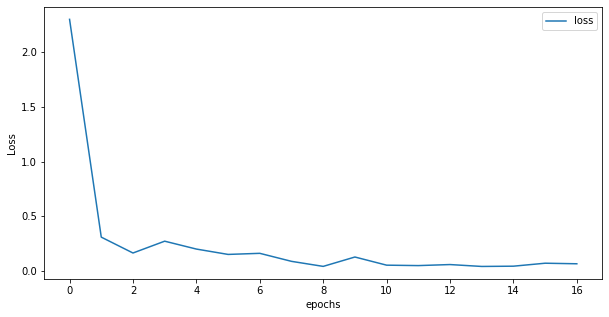

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_loss_list)), train_loss_list, label="loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

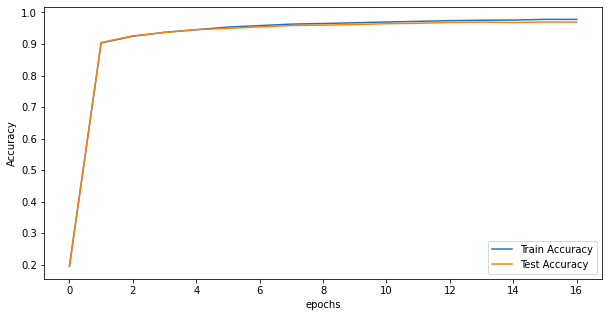

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(train_acc_list)), train_acc_list, label="Train Accuracy")
plt.plot(np.arange(len(test_acc_list)), test_acc_list, label="Test Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
a = {}
a["a"] = 10
a["b"] = "dz"

a.values()

dict_values([10, 'dz'])

In [ ]:
a['a']

10

In [ ]:
a['b']

'dz'